**Aprèn a realitzar mostreig de les dades amb Python.**
# Nivell 1
# Exercici 1
**Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
drive.mount ('/content/drive')
%cd'/content/drive/MyDrive/Sprint 5 (Sampling)'

Mounted at /content/drive
/content/drive/MyDrive/Sprint 5 (Sampling)


Per a la realització d'aquest Sprint, s'ha agafat un Dataset dels atletes olympics desde l'any 1896 (Atenes) fins al 2016 (Rio)

In [ ]:
df = pd.read_csv('athlete_events.csv')
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


En aquest DataFrame podem veure que, com que un mateix atleta es pot presentar a més d'una modalitat, aquest pot aparèixer més d'una vegada, i com que en aquest samplejat voldrem mirar quines son les característiques físiques mitjanes dels atletes, eliminarem tots els atletes repetits per tal d'evitar informació duplicada.
Evidentment també descartarem la variable 'Event' ja que deixaría de tenir sentit si ens quedem només amb una modalitat de cada atleta.
També descartarem les variables 'NOC' i 'Games' perquè repeteixen informació d'altres variables i 'Medal' perque no ens dona informació poc útil.

Les variables amb les que ens quedarem seràn les següents:

* ID: identificador únic de cada atleta
* Name: nom de l'atleta
* Sex: gènere de l'atleta
* Age: edat de l'atleta
* Height: altura de l'atleta (cm)
* Weight: pes de l'atleta (Kg)
* Team: país que representa l'atleta
* Year: any en el que va participar
* Season: estació de l'any en la que va participar
* City: ciutat en la que es van celebrar els jocs
* Sport: esport que practica l'atleta

In [ ]:
df = df.drop_duplicates(subset='ID', keep='first')

In [ ]:
df = df.drop(columns=['Event','NOC', 'Games', 'Medal'])

In [ ]:
df

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,1920,Summer,Antwerpen,Football
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,1988,Winter,Calgary,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,2000,Summer,Sydney,Rowing
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,2016,Summer,Rio de Janeiro,Basketball
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,1976,Winter,Innsbruck,Luge
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,2014,Winter,Sochi,Ski Jumping


Veiem que hi ha una considerable quantitat d'atletes dels quals no sabem l'edat, l'altura ni el pes, així que per desgràcia ens hem de desfer d'aquests atletes ja que precisament són les variables que ens interessen.

In [ ]:
df.isnull().sum()

ID            0
Name          0
Sex           0
Age        6368
Height    33916
Weight    34885
Team          0
Year          0
Season        0
City          0
Sport         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,ID,Age,Height,Weight,Year
count,99088.000000,99088.000000,99088.000000,99088.000000,99088.000000
mean,68318.212347,23.927963,176.366654,71.959879,1989.134890
std,39103.211945,4.717857,10.386070,14.553032,20.162178
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,34744.750000,21.000000,170.000000,62.000000,1976.000000
50%,68494.500000,23.000000,176.000000,71.000000,1992.000000
75%,102087.500000,26.000000,183.000000,80.000000,2004.000000
max,135571.000000,68.000000,226.000000,214.000000,2016.000000


Mostra aleatòria simple

In [ ]:
#Agafem 1000 mostres aleatòries
df.sample(1000)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
179651,90283,Yoshimi Ozaki,F,31.0,155.0,41.0,Japan,2012,Summer,London,Athletics
26873,13974,Laurent Norden Boudouani,M,21.0,176.0,67.0,France,1988,Summer,Seoul,Boxing
175692,88313,Masashi Ohuchi,M,21.0,165.0,80.0,Japan,1964,Summer,Tokyo,Weightlifting
63682,32630,Michael Engeler,M,21.0,172.0,67.0,Switzerland,1992,Summer,Barcelona,Gymnastics
239216,119916,Isobel Rowena Thompson,F,29.0,169.0,63.0,New Zealand,1984,Summer,Los Angeles,Hockey
...,...,...,...,...,...,...,...,...,...,...,...
103200,52212,Yuzuru Inoue,M,25.0,195.0,86.0,Japan,1988,Summer,Seoul,Volleyball
217420,109205,Shan Danna,F,20.0,168.0,60.0,China,2012,Summer,London,Volleyball
195868,98346,Alisher Rahimov,M,22.0,162.0,54.0,Uzbekistan,2000,Summer,Sydney,Boxing
180444,90691,Tibor Pl,M,24.0,168.0,66.0,Hungary,1960,Summer,Roma,Football


In [ ]:
#Agafem el 25% de les mostres totals (també aleatòries)
df.sample(frac =.25)

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
197300,99055,Gheorghe Raovan,M,25.0,149.0,51.0,Romania,1980,Summer,Moskva,Wrestling
85880,43545,Danielle Guneau (-Mnard),F,17.0,164.0,59.0,France,1964,Summer,Tokyo,Athletics
147831,74185,"Katherine Shawn ""Katie"" Maloney",F,26.0,183.0,77.0,United States,2000,Summer,Sydney,Rowing
158458,79541,Clment Mignon,M,23.0,187.0,75.0,France,2016,Summer,Rio de Janeiro,Swimming
96881,49053,"Lszl ""Les"" Hdi",M,18.0,192.0,84.0,Hungary,1952,Summer,Helsinki,Basketball
...,...,...,...,...,...,...,...,...,...,...,...
230602,115742,Georg Streitberger,M,28.0,185.0,94.0,Austria,2010,Winter,Vancouver,Alpine Skiing
264905,132557,Yang Xilan,F,23.0,179.0,73.0,China,1984,Summer,Los Angeles,Volleyball
2502,1408,Mushtaq Ahmed,M,28.0,170.0,70.0,Pakistan,1984,Summer,Los Angeles,Hockey
89248,45232,Moustafa Ismail Mahmud Hamdy,M,24.0,170.0,75.0,Egypt,1996,Summer,Atlanta,Shooting


Mostra sistemàtica.
Com que no sabem si la taula esta construida seguint un ordre, agafarem les mostres el mes separat possible per intentar tenir unes dades el menys sesgat possible. Com que volem 1000 mostres i hi ha 99k, agafarem una cada 99 mostres.

In [ ]:
df.iloc[0:-1:99]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,1964,Winter,Innsbruck,Figure Skating
516,289,Abdul Haji Abdul Latheef,M,17.0,168.0,54.0,Maldives,1988,Summer,Seoul,Athletics
760,434,David Abibssira,M,21.0,179.0,63.0,France,1984,Summer,Los Angeles,Shooting
997,562,Pawe Abratkiewicz,M,21.0,183.0,84.0,Poland,1992,Winter,Albertville,Speed Skating
...,...,...,...,...,...,...,...,...,...,...,...
269641,134928,"Nicole ""Nikki"" Ziegelmeyer (-Brown, -Meyer)",F,16.0,173.0,61.0,United States,1992,Winter,Albertville,Short Track Speed Skating
269963,135063,Tamer Hamed Ali Zinhom Muhammad,M,22.0,190.0,80.0,Egypt,1996,Summer,Atlanta,Swimming
270255,135196,Armin Zggeler,M,20.0,181.0,88.0,Italy,1994,Winter,Lillehammer,Luge
270585,135330,Valery Viktorovich Zubanov,M,21.0,184.0,82.0,Soviet Union,1972,Summer,Munich,Sailing


# Nivell 2
## Exercici 2
**Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).**

Mostra estratificada. Farem dos subgrups dividits per sexes i agafarem 500 de cada un per tenir un total de 1000 mostres.

In [ ]:
dfM = df.loc[df['Sex'] == 'M'].sample(500)
dfM

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
87598,44404,Jzsef Gyuricza,M,22.0,175.0,66.0,Hungary,1956,Summer,Melbourne,Fencing
161324,80971,Dieter Moherndl,M,30.0,182.0,85.0,Germany,1998,Winter,Nagano,Snowboarding
143174,71859,Georgi Borislavov Lozanov,M,18.0,165.0,55.0,Bulgaria,1992,Summer,Barcelona,Gymnastics
44681,23026,Michael Wells Corby,M,24.0,181.0,71.0,Great Britain,1964,Summer,Tokyo,Hockey
152270,76437,Michel Mathiot,M,21.0,163.0,65.0,France,1948,Summer,London,Gymnastics
...,...,...,...,...,...,...,...,...,...,...,...
217621,109308,Konstantin Grigoryevich Sharovarov,M,24.0,181.0,79.0,Soviet Union,1988,Summer,Seoul,Handball
168255,84545,"Raymond ""Ray"" Narh",M,22.0,190.0,60.0,Ghana,2000,Summer,Sydney,Boxing
40918,21082,Choi Yeong-Rae,M,30.0,166.0,74.0,South Korea,2012,Summer,London,Shooting
201325,101128,Jaime Rivera Rodrguez,M,19.0,177.0,65.0,Mexico,1968,Summer,Mexico City,Swimming


In [ ]:
dfF = df.loc[df['Sex'] == 'F'].sample(500)
dfF

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
243989,122190,Tsai Yi-San,F,16.0,160.0,62.0,Chinese Taipei,2000,Summer,Sydney,Diving
168183,84508,Nancy Lynn Napolski-Johnson,F,22.0,157.0,56.0,United States,1996,Summer,Atlanta,Shooting
97766,49478,Ulrike Holmer (-Lederer),F,16.0,154.0,50.0,West Germany,1984,Summer,Los Angeles,Shooting
74365,37767,Carin Leslie Gabarra (Jennings-),F,31.0,173.0,61.0,United States,1996,Summer,Atlanta,Football
149946,75197,Ljiljana Markovi,F,21.0,169.0,58.0,Yugoslavia,1988,Summer,Seoul,Handball
...,...,...,...,...,...,...,...,...,...,...,...
21387,11287,Magorzata Biaecka,F,28.0,164.0,54.0,Poland,2016,Summer,Rio de Janeiro,Sailing
59031,30219,Suwimol Duandchan,F,18.0,162.0,55.0,Thailand,1992,Summer,Barcelona,Tennis
198934,99913,Ren Cancan,F,24.0,167.0,51.0,China,2012,Summer,London,Boxing
266904,133540,Yekaterina Petrovna Yusheva,F,27.0,175.0,73.0,Russia,2000,Summer,Sydney,Fencing


In [ ]:
pd.merge(dfM, dfF, how = 'outer')

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
0,44404,Jzsef Gyuricza,M,22.0,175.0,66.0,Hungary,1956,Summer,Melbourne,Fencing
1,80971,Dieter Moherndl,M,30.0,182.0,85.0,Germany,1998,Winter,Nagano,Snowboarding
2,71859,Georgi Borislavov Lozanov,M,18.0,165.0,55.0,Bulgaria,1992,Summer,Barcelona,Gymnastics
3,23026,Michael Wells Corby,M,24.0,181.0,71.0,Great Britain,1964,Summer,Tokyo,Hockey
4,76437,Michel Mathiot,M,21.0,163.0,65.0,France,1948,Summer,London,Gymnastics
...,...,...,...,...,...,...,...,...,...,...,...
995,11287,Magorzata Biaecka,F,28.0,164.0,54.0,Poland,2016,Summer,Rio de Janeiro,Sailing
996,30219,Suwimol Duandchan,F,18.0,162.0,55.0,Thailand,1992,Summer,Barcelona,Tennis
997,99913,Ren Cancan,F,24.0,167.0,51.0,China,2012,Summer,London,Boxing
998,133540,Yekaterina Petrovna Yusheva,F,27.0,175.0,73.0,Russia,2000,Summer,Sydney,Fencing


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

Aprofitarem que hi ha menys de la meitat de dades de noies i aplicarem el mètode de oversampling amb SMOTE perque hi hagui més.

In [ ]:
df.Sex.value_counts()

M    69279
F    29809
Name: Sex, dtype: int64

En aquesta gràfica veiem la distribució de tots els atletes classificats per altura, pes i sexe. Després d'haver resamplejat el dataset tornarem a grafirar-lo per veure com ha canviat.

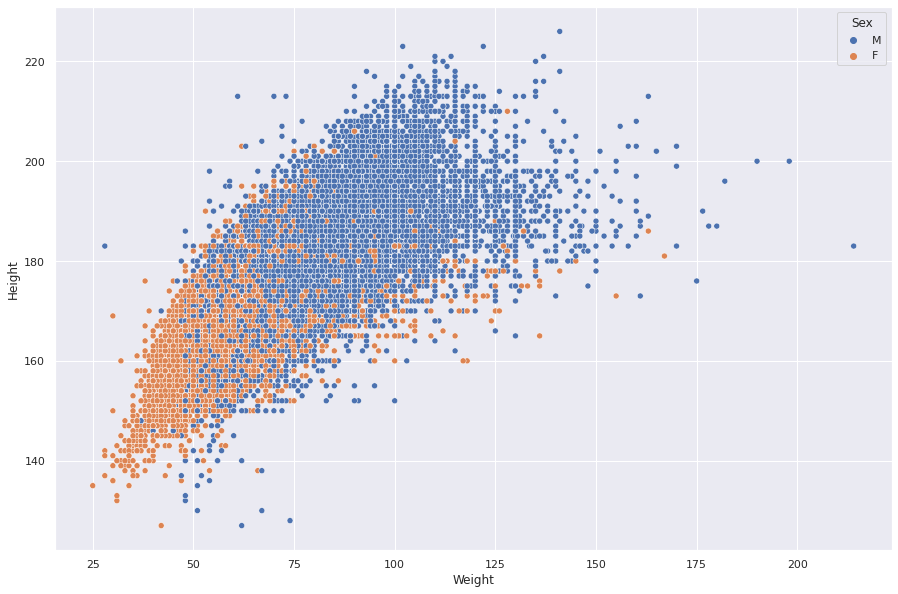

In [ ]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = df, x = 'Weight', y='Height', hue='Sex')

Li diem la columna de la qual crearà noves mostres segons la falta de mostres que hi hagi d'una classe (Sex), i les columnes les quals volem que ens ompli d'informació (Weight, Height i Age).

In [ ]:
smote = SMOTE(sampling_strategy='minority')
X_sm, Y_sm = smote.fit_resample(df[['Weight', 'Height', 'Age']], df[['Sex']])

La cel·la anterior ens generara dos dataframes, un per a la variable principal per a la que es basarà el resampling (Y_sm) i un altre per les altres variables que volem que ens generi informació (X_sm). Juntem els dos dataframes per poder graficarla.

In [ ]:
dfSmote = X_sm.join(Y_sm)

Veim que efectivement s'han generat més mostres per a les noies 

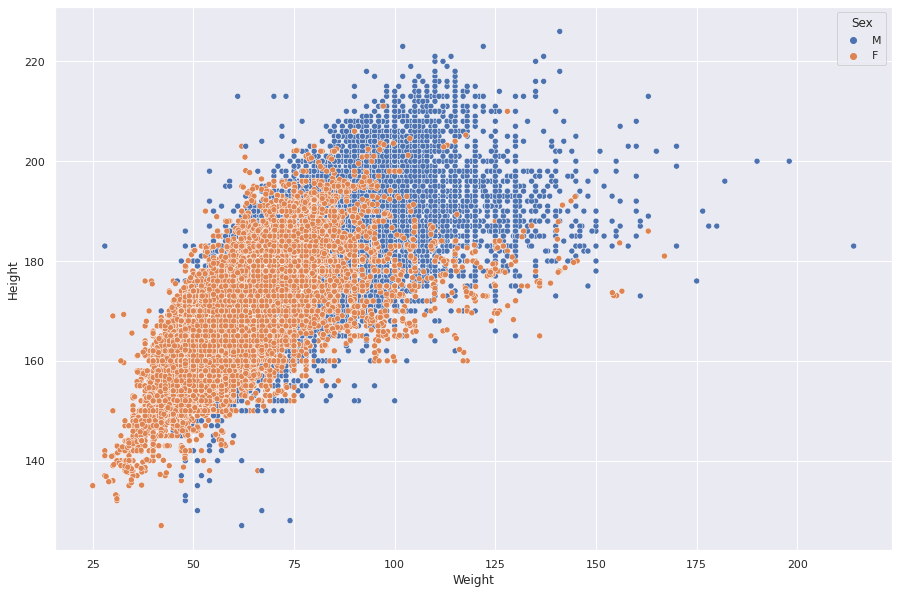

In [ ]:
sns.set(rc={"figure.figsize":(15, 10)})
sns.scatterplot(data = dfSmote, x = 'Weight', y='Height', hue='Sex')

# Nivell 3
## Exercici 3
**Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling**

In [ ]:
import random

In [ ]:
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number

stream = generator(df.shape[0])

k=1000
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
             reservoir[random.choice(range(0,k))] = element
dfR = df.iloc[reservoir]

In [ ]:
dfR

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport
137571,69152,Olga Sergeyevna Levina-Akopyan,F,27.0,176.0,63.0,Russia,2012,Summer,London,Handball
222318,111697,Yury Georgiyevich Skobov,M,22.0,176.0,70.0,Soviet Union,1972,Winter,Sapporo,Cross Country Skiing
260840,130515,Eva Willemarck,F,25.0,172.0,70.0,Belgium,2010,Winter,Vancouver,Bobsleigh
187636,94297,Cole Robert Peverley,M,20.0,182.0,74.0,New Zealand,2008,Summer,Beijing,Football
93222,47202,Derek Heidt,M,22.0,178.0,73.0,Canada,1998,Winter,Nagano,Snowboarding
...,...,...,...,...,...,...,...,...,...,...,...
118424,59907,Kim Gwong-Hyong,M,26.0,167.0,52.0,North Korea,1972,Summer,Munich,Wrestling
2450,1373,Ramli Ahmad,M,19.0,175.0,67.0,Malaysia,1976,Summer,Montreal,Athletics
101518,51337,Guy Huyghens,M,27.0,186.0,75.0,Belgium,1960,Summer,Roma,Hockey
71805,36546,Antony John Fowler,M,25.0,179.0,75.0,Great Britain,2016,Summer,Rio de Janeiro,Boxing
